In [ ]:
import numpy as np

def calculate_distance(x_i, y_i):
    return np.abs(x_i - y_i)

def calculate_time_normalized_distance(g_c_prev, d_c, w_k):
    return g_c_prev + d_c * w_k

def detect_anomalies(x, y, I, J):
    # Step 1: Calculate the time-normalized distance
    N = len(x) + len(y)
    g_c = np.zeros((len(x) + 1, len(y) + 1))
    for i in range(1, len(x) + 1):
        g_c[i][0] = g_c[i - 1][0] + calculate_distance(x[i - 1], y[0])
    for j in range(1, len(y) + 1):
        g_c[0][j] = g_c[0][j - 1] + calculate_distance(x[0], y[j - 1])
    for i in range(1, len(x) + 1):
        for j in range(1, len(y) + 1):
            g_c[i][j] = min(g_c[i - 1][j - 2] + 2 * calculate_distance(x[i - 1], y[j - 2]) + calculate_distance(x[i - 1], y[j - 1]),
                            g_c[i - 1][j - 0] + 2 * calculate_distance(x[i - 1], y[j - 1]),
                            g_c[i - 2][j - 1] + 2 * calculate_distance(x[i - 2], y[j - 1]) + calculate_distance(x[i - 1], y[j - 1]))
    time_normalized_distance = g_c[-1][-1] / N
    
    # Step 2: Check boundary and other conditions
    if x[0] != 1 or y[0] != 1 or x[-1] != I or y[-1] != J:
        return "Boundary conditions not satisfied. Anomaly detected."
    
    anomaly_positions = []
    anomaly_values = []
    for k in range(1, len(x)):
        if x[k - 1] > x[k] or y[k - 1] != y[k] or x[k] - x[k - 1] > 1 or y[k] - y[k - 1] > 1:
            anomaly_positions.append(k)
            anomaly_values.append((x[k], y[k]))
    
    # Step 3: Weighting the coefficients
    weights = [(x[k] - x[k - 1]) + (y[k] - y[k - 1]) for k in range(1, len(x))]
    weighted_distance = time_normalized_distance * np.sum(weights)
    
    if weighted_distance > threshold:
        anomalies = [(pos, values) for pos, values in zip(anomaly_positions, anomaly_values)]
        return "Anomalies detected at positions: " + ', '.join(str(pos) + "(" + str(values) + ")" for pos, values in anomalies)
    else:
        return "No anomalies detected."

# Example usage

x = [1,2,3,3,4,5]
y = [1,2,2,3,3,4]
I = 5
J = 4
threshold = 0.5

result = detect_anomalies(x, y, I, J)
print(result)


Anomalies detected at positions: 1((2, 2)), 3((3, 3)), 5((5, 4))


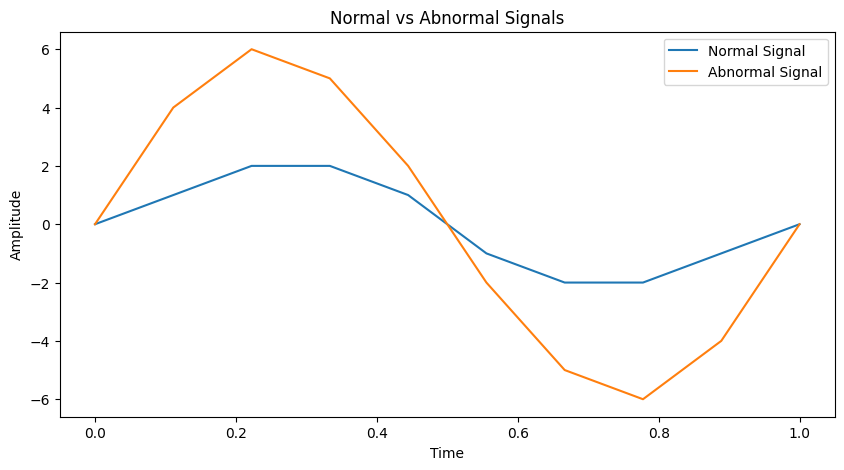

[0, 1, 2, 2, 1, -1, -2, -2, -1, 0]
[0, 4, 6, 5, 2, -2, -5, -6, -4, 0]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate time values
t = np.linspace(0, 1, 10)

# Normal Signal
normal_amplitude = 2
normal_frequency = 10
normal_signal = np.round(normal_amplitude * np.sin(2 * np.pi * normal_frequency * t))

# Abnormal Signal
abnormal_amplitude = 6
abnormal_frequency = 10
abnormal_signal = np.round(abnormal_amplitude * np.sin(2 * np.pi * abnormal_frequency * t))

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(t, normal_signal, label='Normal Signal')
plt.plot(t, abnormal_signal, label='Abnormal Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Normal vs Abnormal Signals')
plt.legend()
plt.show()

print(list(normal_signal.astype(int)))
print(list(abnormal_signal.astype(int)))

